# Publishing a package

In the previous chapters we developed a package named "calculator-lib" aiming at doing computations with images. We started out by crafting a solid roadmap and in the last chapter we implemented most of what is needed for our first milestone: `v0.1.0`:

We only have two issues left for milestone `v0.1.0`: implement string representation and implement plotting. We are going to reduce our expectations a bit for this milestone and we will move both of these issues to milestone `v0.2.0` such that we are ready to publish our package.

Usually the last step in the code is to make a release PR which does two things:

- update the version number of the package in `pyproject.toml`
- update what is called the "changelog" in the documentation

In our case, the version number is already good:

```toml
[project]
name = "calculator"
version = "0.1.0"
description = "Python library to compute things."
```

But, for the next release on, we will need to modify it. All we need to do is to write the changelog of this release.

## The changelog

A changelog is basically a list of changes that occured in the package since the last version. It can be more or less detailed and changes can be grouped in different sections like "API changes", "Bug fixes", "New features" and so on. The idea is that other projects that might later depend on our package will have a list of modifications to take a look at in order to understand if they can still depend on the latest version of the package or if they need to take actions in order to do so. Usually this is a page that you find at the bottom of the left menu of the documentation.

Let's switch to a new feature branch:

```bash
$ git switch -c release-0.1.0
```

And create a new file `docs/changelog.md` with the following content:

```markdown
# Changelog of calculator-lib

All notable changes to this project will be documented in this file.

The format is based on [Keep a Changelog](http://keepachangelog.com/en/1.0.0/)
and this project adheres to [Semantic Versioning](http://semver.org/spec/v2.0.0.html).

## [v0.1.0] - 2025-06-26

This is the first release of the calculator-lib package.

- Add the `Image` class that represents images loaded in memory.
- Add the `add` function to perform element-wise additions between two images.
```

For this tutorial we'll stay pretty classic but you can be creative and add things like a link to the relevant PRs, names of contributors which made the release possible, small examples of API changes...

We still need to add the new page to the index of our documentation. Open `docs/index.rst` and add the page to the toctree. You can build the documentation locally to see how it looks like:

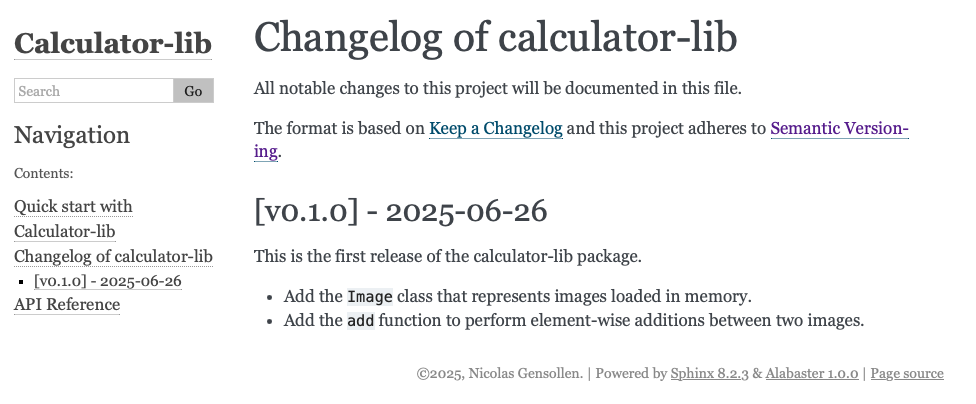

In [2]:
from IPython.display import Image

Image(filename="../images/changelog.png")

## Git tags

OK, seems good enough. Let's commit and push:

```bash
$ git add docs/changelog.md docs/index.rst
$ git push origin release-0.1.0
```

Open a PR targetting the `dev` branch and merge it.

At this point, we should be, more or less, in this situation:

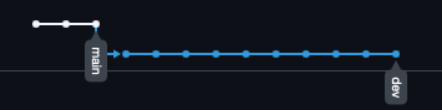

In [7]:
Image(filename="../images/branches.png")

The `dev` branch is several commits ahead of `main`, which is the default branch of the repository and the one we will use for releasing. At this point we need to merge `dev` into `main`:

```bash
$ git switch main
$ git pull origin main
$ git merge dev
$ git push origin main
```

A release is basically linked to the source code in a given state and we need to identify that state. Thanks to version control, the state of the code is already encoded in commits such that a commit hash identifier could be used. In practice, it's not handy to manipulate commit hash values and git has a way of associating a specific commit with a string identifier. This is called a "tag". Let's tag the current commit:

```bash
$ git tag -a v0.1.0 -m "Release v0.1.0"
$ git push origin main --tags
```

If you got to the Github page you should see that the number of tags is now equal to one:

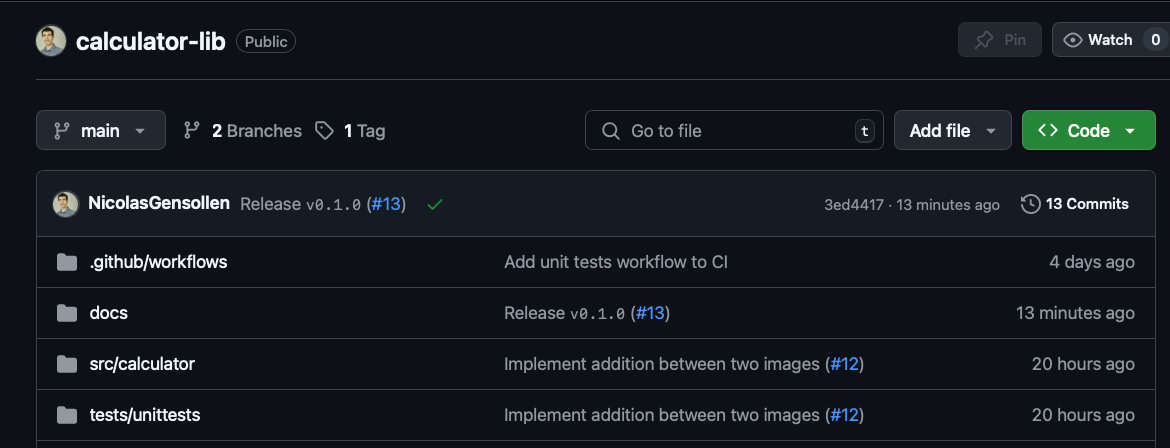

In [10]:
Image(filename="../images/tag_github.png")

Alright, our code base is ready to be published, but we still have to see where and how to publish it.

## Pypi

Pypi stands for *Python Package Index* and is the reference online source for downloading Python packages from the community. It is commonly used through a tool called `pip` which enables downloading and installing packages from Pypi by using their names. For example:

```bash
$ pip install numpy
```

will download some version of Numpy from Pypi and install it on your machine.

### Wheel files and source distribution archives

What does it mean "download a package from Pypi" exactly ? What is being downloaded ? 

Well, it depends. It can basicaly be either a wheel file (`.whl` extension) or a source distribution archive (usually a `.tar.gz` file). A source distribution archive is basically the compressed source code of the package such that, once donwloaded, it must be compiled on the user's machine. This has the advantage of being flexible but the important disadvantage of being slow.

A wheel file is a pre-compiled binary file such that, once downloaded, the installation is extremely fast. However, the source code should have been compiled on the correct platform and architecture to work correctly on your machine. We can differentiate two types of wheel files:

- universal wheel which have a name looking like `py2.py3-non-any.whl` which are compatible with all versions of Python and all platforms.
- platform specific wheel which have names like `cp38-cp38-manylinux2010_x86_64.whl`. These wheels are built for specific platforms.

Luckily, when you do `pip install numpy`, all the magic of looking out for exisitng wheels matching your setup and defaulting to downloading and compiling the source distribution is done for you under the hood. Still, it's good to keep in mind these differences

Releasing a package basically means generating these items and sending them, along with package metadata, to Pypi. Pypi will then serve them for anybody willing to install your package in the world.

We are going to need a tool to generate these items from our source code, and send them to the Pypi API with the correct credentials. Once again, Poetry is here for us and will provide everything we need out of the box !

### Generating the wheel files and source distribution with Poetry

Poetry make this extremely simple, from the root of the package, run:

```bash
$ poetry build
Building calculator (0.1.0)
Building sdist
  - Building sdist
  - Built calculator-0.1.0.tar.gz
Building wheel
  - Building wheel
  - Built calculator-0.1.0-py3-none-any.whl
```

This creates a folder named `dist` with the source distribution archive and a universal wheel for Python 3:

```bash
$ tree dist
dist
├── calculator-0.1.0-py3-none-any.whl
└── calculator-0.1.0.tar.gz

1 directory, 2 files
```

### Installing our package from a wheel file or a source distribution archive

To verify that we can actually install our package from one of these files, let's deactivate our current conda environment, create a new one and install our package from the wheel file:

```bash
$ conda deactivate
$ conda create -n test-wheel python=3.12
$ conda activate test-wheel
$ pip install dist/calculator-0.1.0-py3-none-any.whl
Processing ./dist/calculator-0.1.0-py3-none-any.whl
Collecting numpy>=2.0.0 (from calculator==0.1.0)
  Downloading numpy-2.3.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Downloading numpy-2.3.1-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 15.3 MB/s eta 0:00:00
Installing collected packages: numpy, calculator
Successfully installed calculator-0.1.0 numpy-2.3.1
```

You can then open a Python interpreter and use calculator-lib. You can do the same with the source distribution and, although it won't change much because our package is dead simple, you'll see that it's longer because of the compiling step.

### Test Pypi

We already did half the job, let's focus on the other half now: sending data to Pypi.

First, let's deactivate this environment and reactivate our working environment:

```bash
$ conda deactivate
$ conda activate calculator
```

First of all, we are not going to use Pypi directly in this tutorial because we don't really want to publish our useless package to the world. We are going to use "test Pypi" which is a testing platform mimicking the original. It is often used as a testing step prior to actually releasing on Pypi. If the release isn't working on test Pypi, there is almost no chance that it's gonna work on Pypi.

Moreover and very importantly, once a package is published, it's done! There is no way to undo it. Unlike git and github were you can "force push" to correct a mistake, Pypi won't let you do that. So, if you screwed something up in the latest release then your only option is to make a new release and flag the broken release as "yanked", meaning that package managers won't select it. It's something to take into account as a package with dozens of broken release does not gives a lot of confidence to users.

For all these reasons, it's strongly recommanded to test the release to test Pypi before going to the world on Pypi.

#### Create an API token on test Pypi

First of all, create an account on test pypi, then go to the settings and scroll down to the API tokens section where you'll find a list of tokens that you have previously generated. If you just created your account, this list should be empty. Click on "Add a new API token" and fill the information like this:

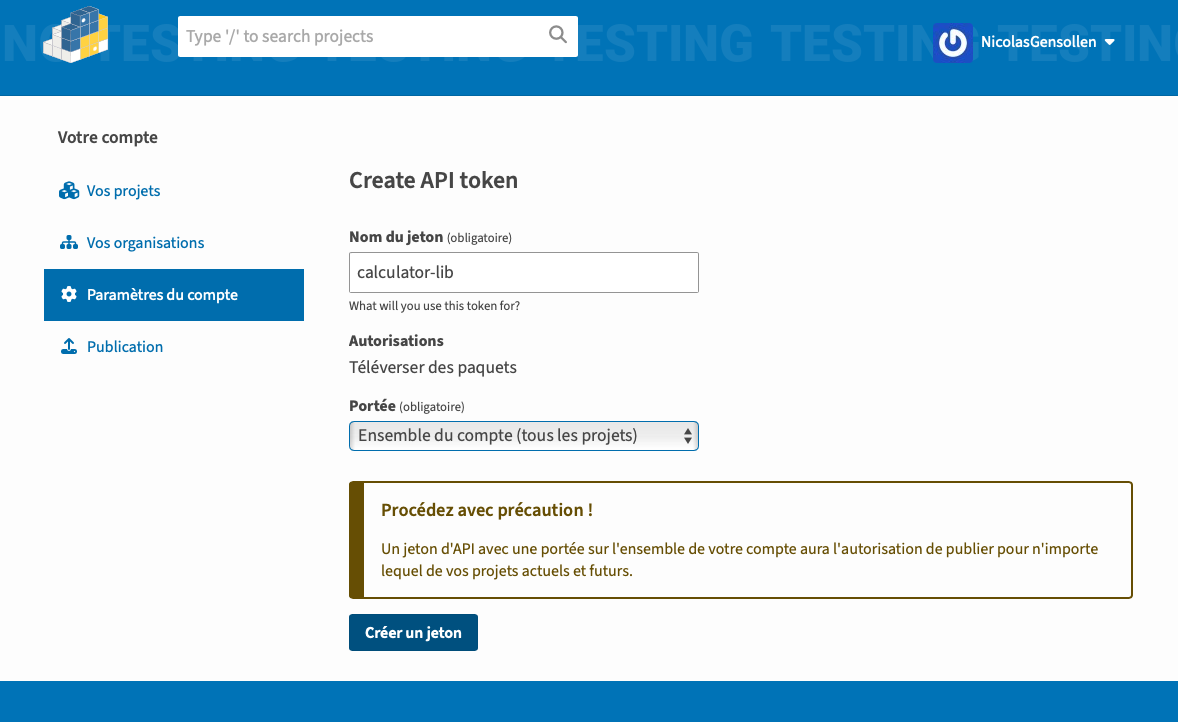

In [8]:
Image(filename="../images/test_pypi_1.png")

When looking at "Portée", you shouldn't see calculator-lib. If you just created you test Pypi account, the list is probably empty. We will select "Ensemble du compte (tous les projets)" for now, but as Test Pypi is telling us, this is dangerous because an attacker having this token could alter all our projects which is very bad. The idea is that we will use this token for a first release, such that test pypi is aware of our calculator-lib project. Once released, we will delete this token and generate a new one with a restricted permission set: only the calculator-lib project that will now be in the list.

Let's click on "Créer un jeton" which should lead you to the following page:

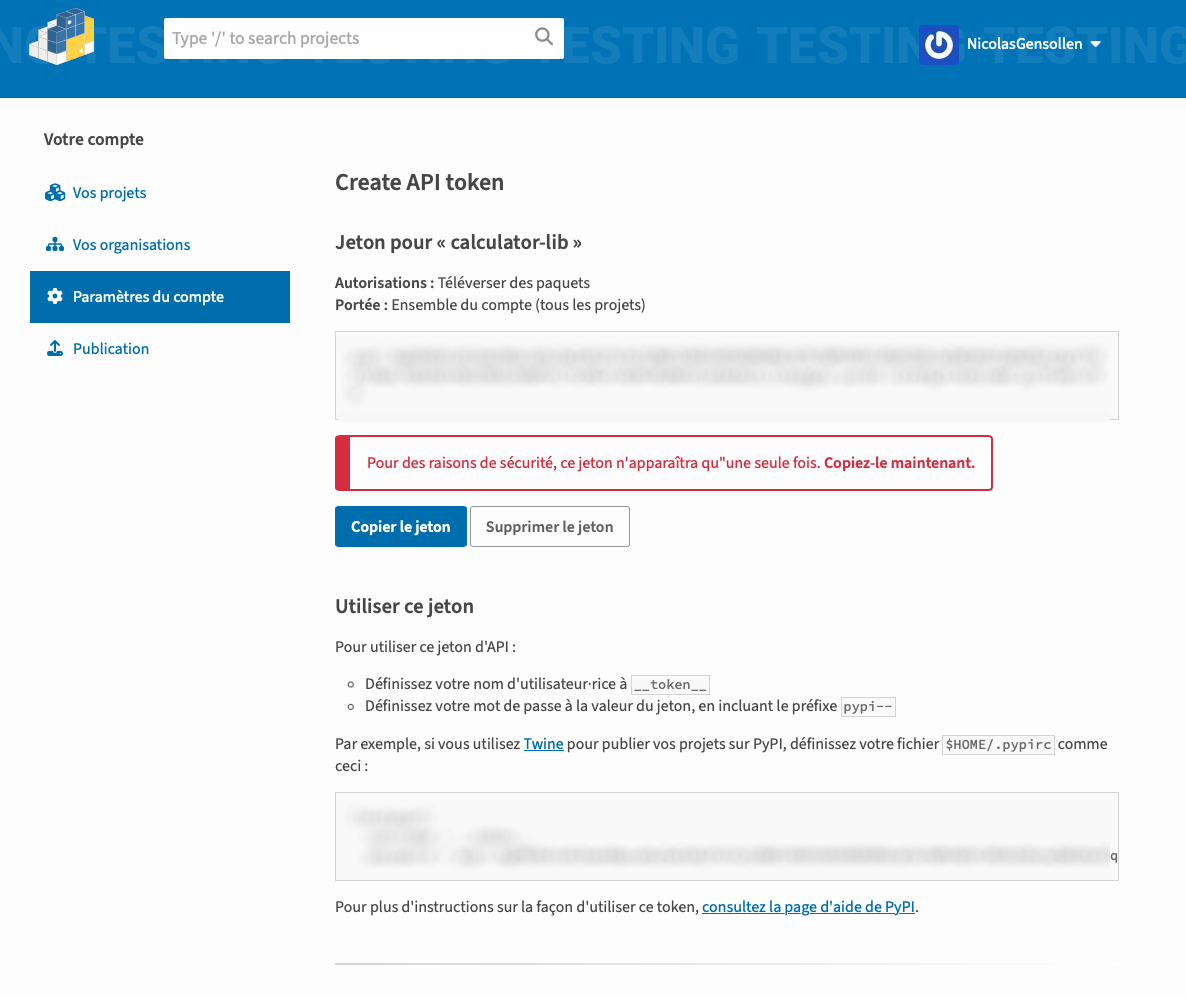

In [9]:
Image(filename="../images/test_pypi_2.png")

The string of random-like characters is your token, it is a sensitive piece of information so do not copy paste it in non encrypted files.

This is all we need to publish our package using Poetry. Let's first try to do it manually to understand how it works. First, we can store the URL of test Pypi in Poetry's config:

```bash
$ poetry config repositories.test-pypi https://test.pypi.org/legacy/
```

Now, we can use the following command to publish our package to test Pypi (make sure to paste your own token after the `-p`):

```bash
$ poetry publish -r test-pypi -u __token__ -p pypi-AgENdGV......xW6-g1TPsmtvfFD
Publishing calculator (0.1.0) to test-pypi
 - Uploading calculator-0.1.0-py3-none-any.whl FAILED

HTTP Error 403: Forbidden | b"<html>\n <head>\n  <title>403 The user 'NicolasGensollen' isn't allowed to upload to project 'calculator'. See https://test.pypi.org/help/#project-name for more information.\n \n <body>\n  <h1>403 The user 'NicolasGensollen' isn't allowed to upload to project 'calculator'. See https://test.pypi.org/help/#project-name for more information.\n  Access was denied to this resource.<br/><br/>\nThe user &#x27;NicolasGensollen&#x27; isn&#x27;t allowed to upload to project &#x27;calculator&#x27;. See https://test.pypi.org/help/#project-name for more information.\n\n\n \n"
```

We get a pretty bad error saying that we're not allowed to upload to the project named "calculator". We get this error because we didn't think in advance about our package name. Remember that Pypi (and test Pypi) are package registries where a name is linked to a specific package. A direct consequence is that names should be unique on these registries. Of course, someone already took the name "calculator" on test Pypi since it's not particularly original.

Years ago this would have been a nightmare but with the progress in Python packaging, we are going to fix this problem easily. We are also going to see that, since we didn't publish, it's fine to get errors. Git will let us rewrite the history and fix things, no one will ever know...

#### Change the name of the package

In this section, we are going to change the name of our package and see that it can be done easily without impacting how we use our package. Let's modify our package specifications in the `pyproject.toml` file:

```toml
[project]
name = "calculator-nico"
version = "0.1.0"
description = "Python library to compute things."
authors = [
    {name = "NicolasGensollen",email = "nicolas.gensollen@gmail.com"}
]
license = {text = "MIT"}
readme = "README.md"
requires-python = ">=3.12"
dependencies = [
    "numpy (>=2.0.0)"
]

[tool.poetry]
packages = [
    { include = "calculator", from = "src" },
]
```

We basically changed the name of the project to be more original. You can actually look for packages on Pypi to see if a name already exists or not. "calculator-nico" doesn't seem to exist so let's go with that...

However, we don't want to change all of our imports from:

```python
from calculator import XXX
```

to:

```python
from calculator-nico import XXX
```

Our project is still pretty small but it would already be annoying to do so. Fortunately, the name of the package and the name of the code folder are two distinct concepts such that we can declare that our package lives in the `src/calculator` folder while being named "calculator-nico". Users would install it through

```bash
$ pip install calculator-nico
```

But use it like this:

```python
from calculator import Image
```

OK, perfect! Let's commit that and push our modifications:

```bash
$ git add pyproject.toml
$ git commit -m "Change name of project"
$ git push origin main
```

#### Modify the git history

Well, not so fast! Looking at out project's history we have:

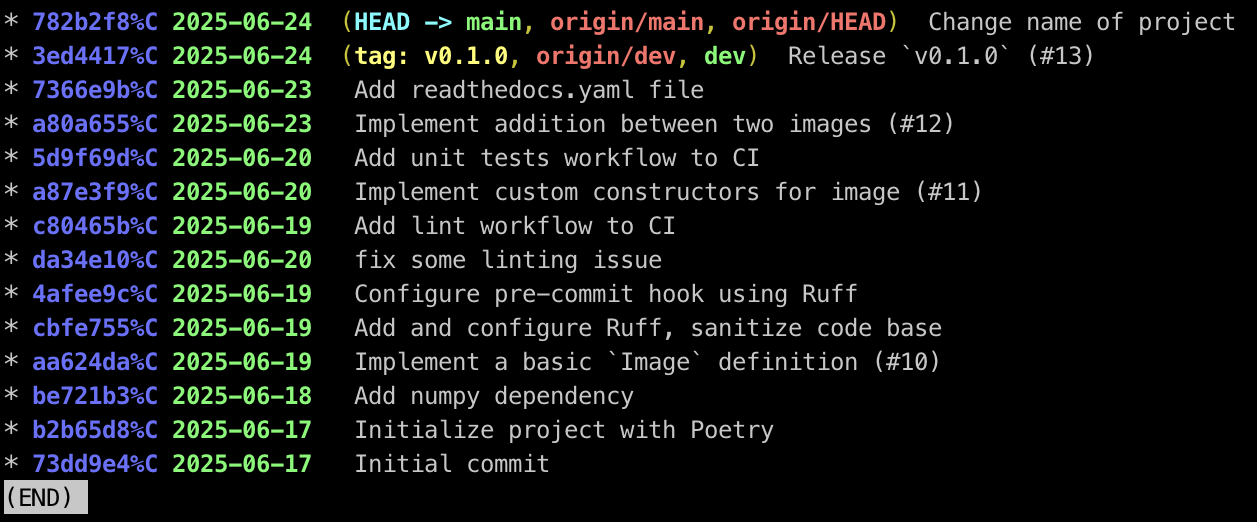

In [11]:
Image(filename="../images/bad_history.png")

The commit holding the v0.1.0 tag, and hence the state of the code for release v0.1.0 comes *before* our name change so we can't do it from this state. Fortunately, this is git's world and we can modify the history to make *as if* we had thought about changing the name *before* doing the release PR and tagging the corresponding commit. There are multiple solutions but one nice way to do it is to rebase in interactive mode:

```bash
$ git rebase -i HEAD~2
```

Here, github should open a list of commits with only the last two commits. Simply swap them to make the name correction happen before the tagging. Once finished, you should have the following, much better looking, history:

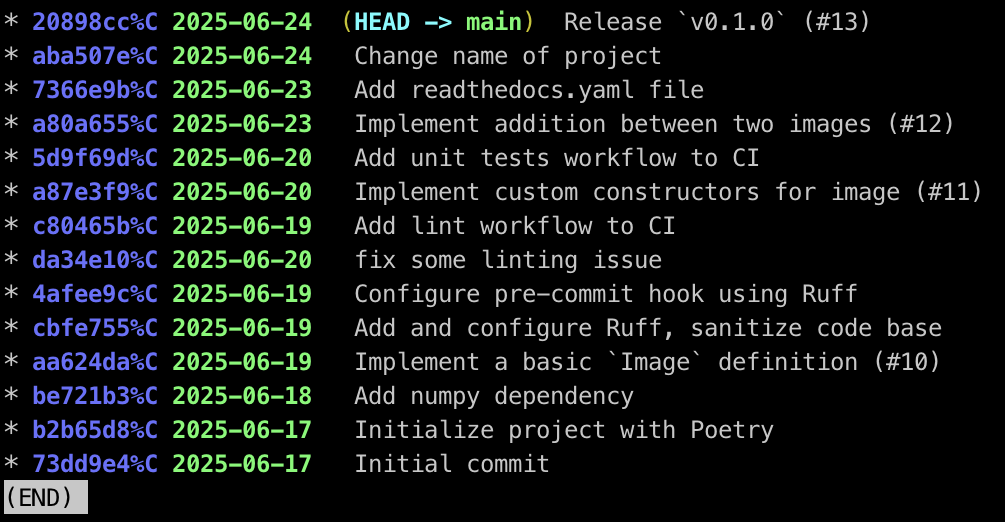

In [12]:
Image(filename="../images/better_history.png")

We can update our remote:

```bash
$ git push -f origin main
```

At this point, you should be in a clean state:

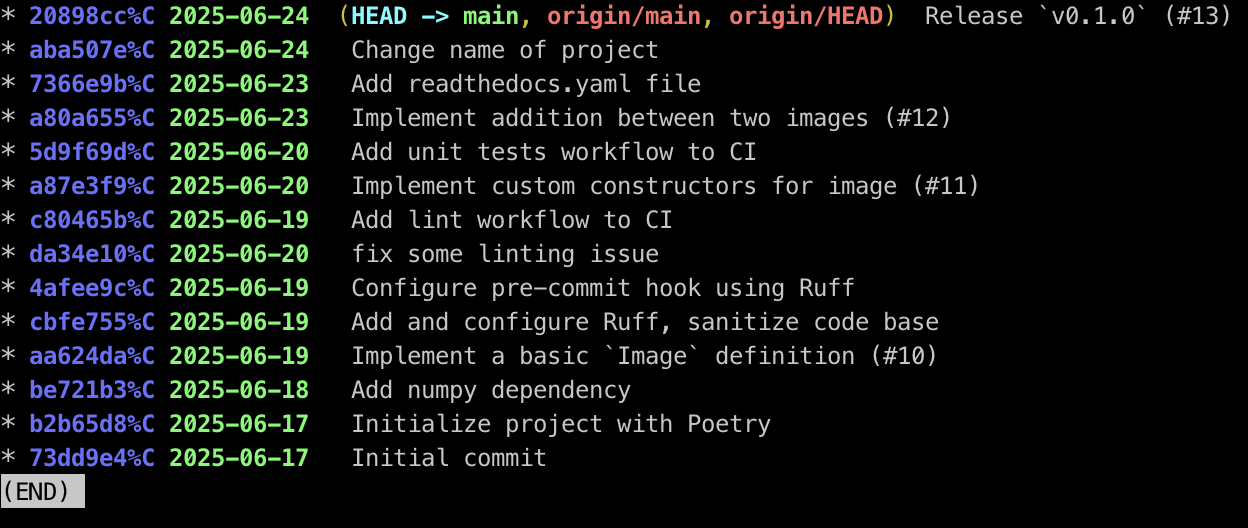

In [13]:
Image(filename="../images/good_history.png")

We only need to clean our `dev` branch by setting it to the `main` branch:

```bash
$ git switch dev
$ git reset --hard main
$ git push -f origin dev
```

Now, we should be able to publish the package using Poetry:

```bash
$ poetry publish -r test-pypi -u __token__ -p pypi-AgENdGVzdC5weX......xW6-g1TPsmtvfFD
Publishing calculator-nico (0.1.0) to test-pypi
 - Uploading calculator_nico-0.1.0-py3-none-any.whl 100%
 - Uploading calculator_nico-0.1.0.tar.gz 100%
```

It seemed to work. We can verify that our package was indeed published:

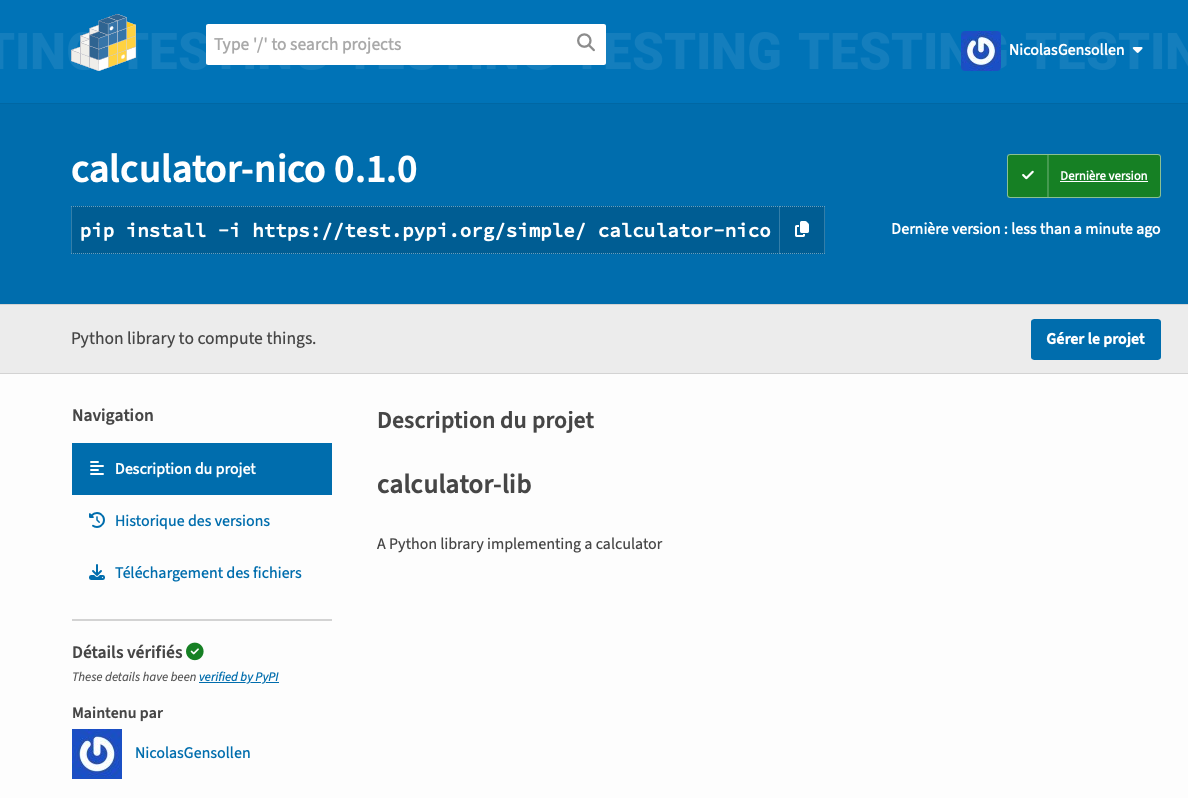

In [14]:
Image(filename="../images/published.png")

Great ! Let's try to install it from test pypi. Create a new conda environment, pip install it, and try using it:

```bash
$ conda deactivate
$ conda create -n test-pypi python=3.12
$ conda activate test-pypi
$ pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple calculator-nico
Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple
Collecting calculator-nico
  Using cached https://test-files.pythonhosted.org/packages/d1/89/018ebaa1e10fcf9743a82e0a9ce8ed7e854f5dd05475d7cd5199c00399a3/calculator_nico-0.1.0-py3-none-any.whl.metadata (540 bytes)
Collecting numpy>=2.0.0 (from calculator-nico)
  Using cached numpy-2.3.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Downloading https://test-files.pythonhosted.org/packages/d1/89/018ebaa1e10fcf9743a82e0a9ce8ed7e854f5dd05475d7cd5199c00399a3/calculator_nico-0.1.0-py3-none-any.whl (3.2 kB)
Using cached numpy-2.3.1-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Installing collected packages: numpy, calculator-nico
Successfully installed calculator-nico-0.1.0 numpy-2.3.1
$ python
Python 3.12.11 | packaged by conda-forge | (main, Jun  4 2025, 14:38:53) [Clang 18.1.8 ] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> from calculator import Image, add
>>>
```

That's it, our package has been published on test pypi and can be installed by other people around the globe. Note that everything we just did would be exactly the same on Pypi but the command to install the package would be much simpler:

```bash
$ pip install calculator-nico
```

The last thing we should do is to delete our token that has too many permissions and replace it with a new one, specific to our package. We will do that in the next section while making our last improvement: automating the publication step with a GitHub action.

### Automating the publication process

Publishing packages manually like we did works but is not ideal. There are several manual steps to remember and it is easy to make a mistake. The solution is, once again, automation. Our objective in this section is to write a github action that will perform the publication step to test pypi for us.

As you may have noticed, github actions are triggered when some events happen. In order to trigger our publication workflow, we need a Github event specific to a release. It turns out there exists such an event and it's called... a release.

#### The GitHub releases

Github releases are not mandatory to publish a package and make it installable for other people as we just saw. It's something specific to github and unrelated to Pypi, but they provide some useful features such as:

- give a reference point in the code history (like a tag but richer as we will see)
- give a way to share binary files or source archives directly from the GitHub UI
- Document the changes between versions (useful for projects that don't maintain as changelog in their docs)
- And of course, provide an event specific to a release that we can use to trigger automatic workflows

Let's see what it looks like by creating one for our `v0.1.0` release. Click on "Releases" in the right column of the main page of the Github repository and click on "Create a new release". You can then select the `v0.1.0` tag to link the release to a specific commit, and hence, to a specific state of the code:

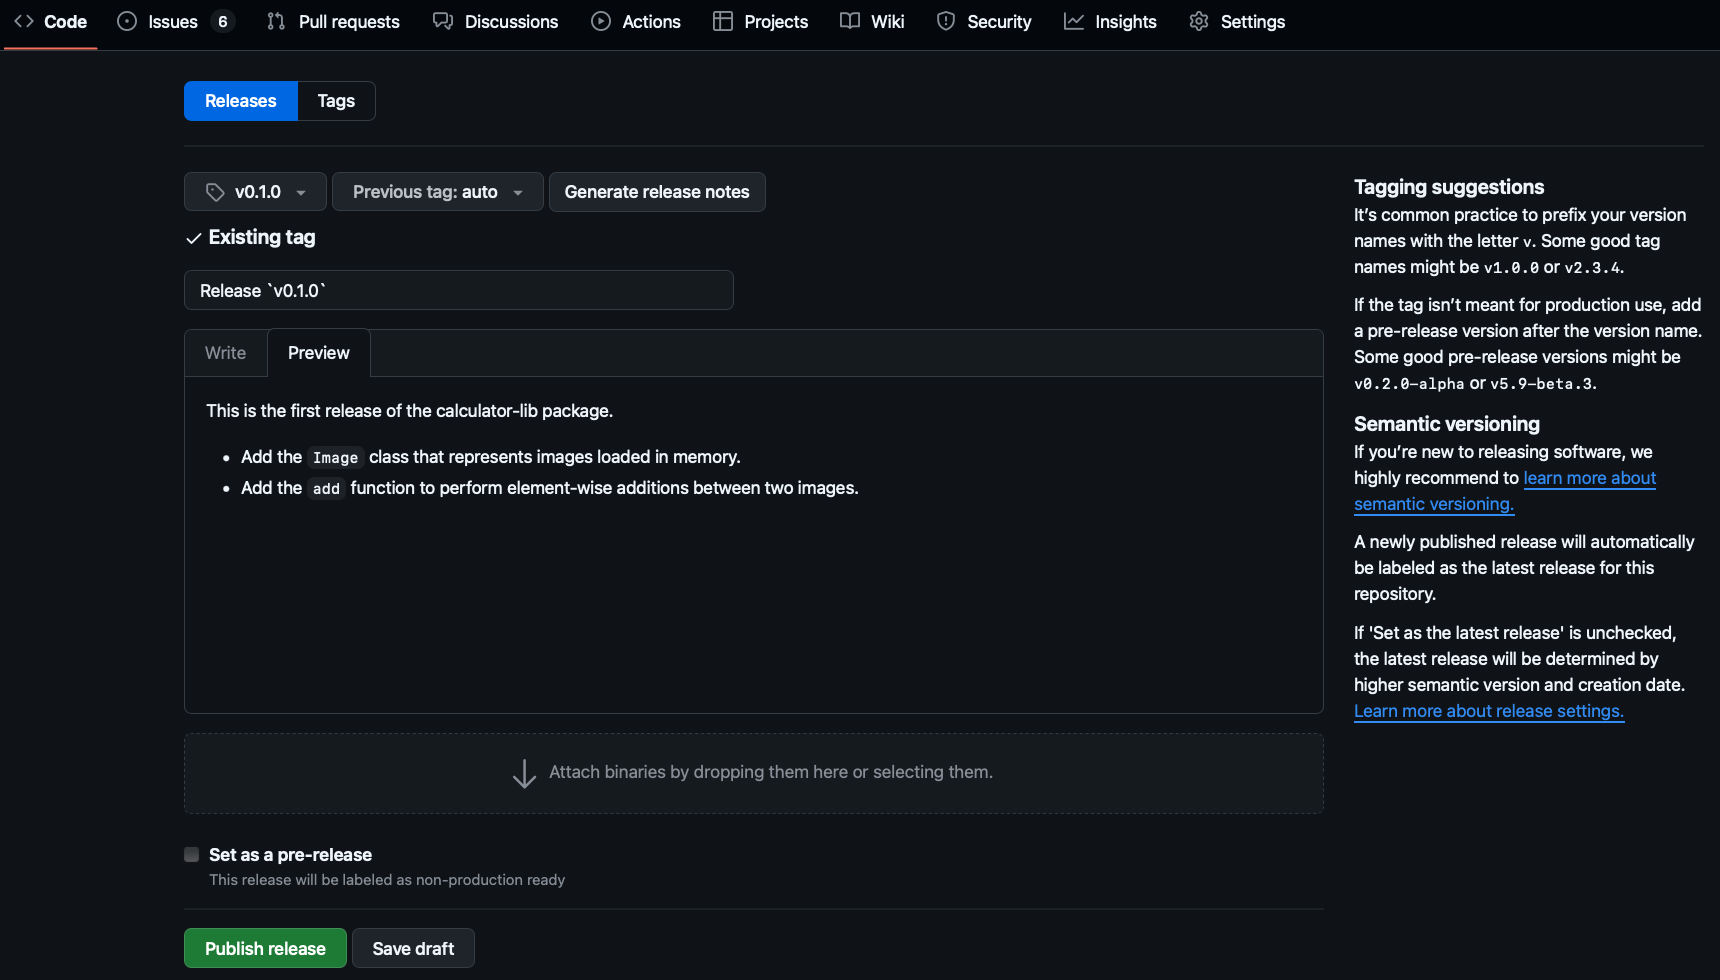

In [4]:
Image(filename="../images/release_1.png")

Once published, the release should look like this:

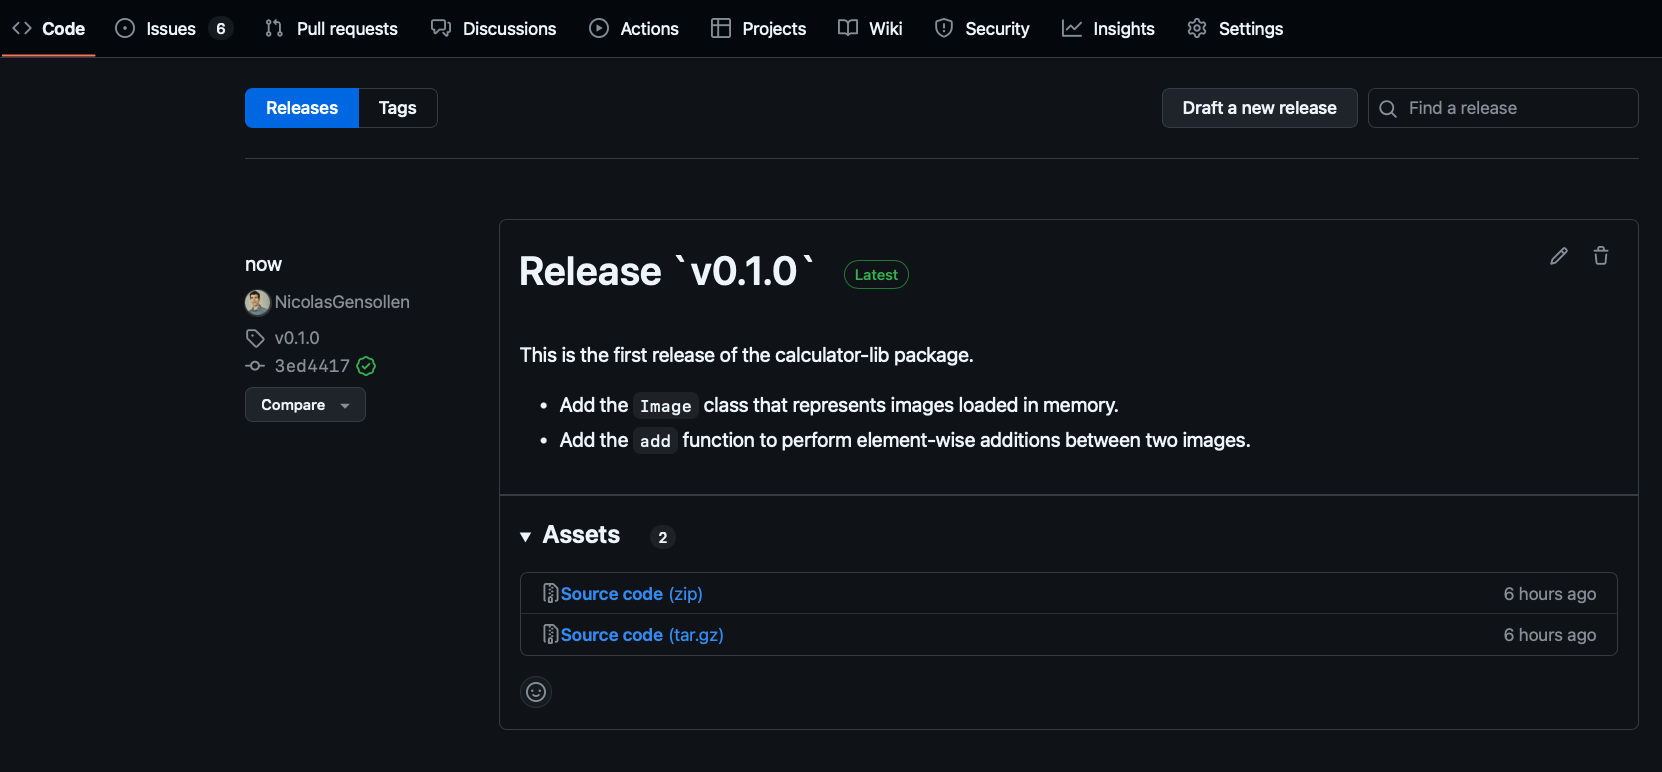

In [5]:
Image(filename="../images/release_2.png")

As you can see, Github took the liberty of attaching the source distribution archive to the release. It's possible to add more assets like wheel files if needed.

Now that we understand what is a Github release and how to do one, let's do the token part before we forget about it. Go back to your test Pypi account and delete the token we created in the previous section:

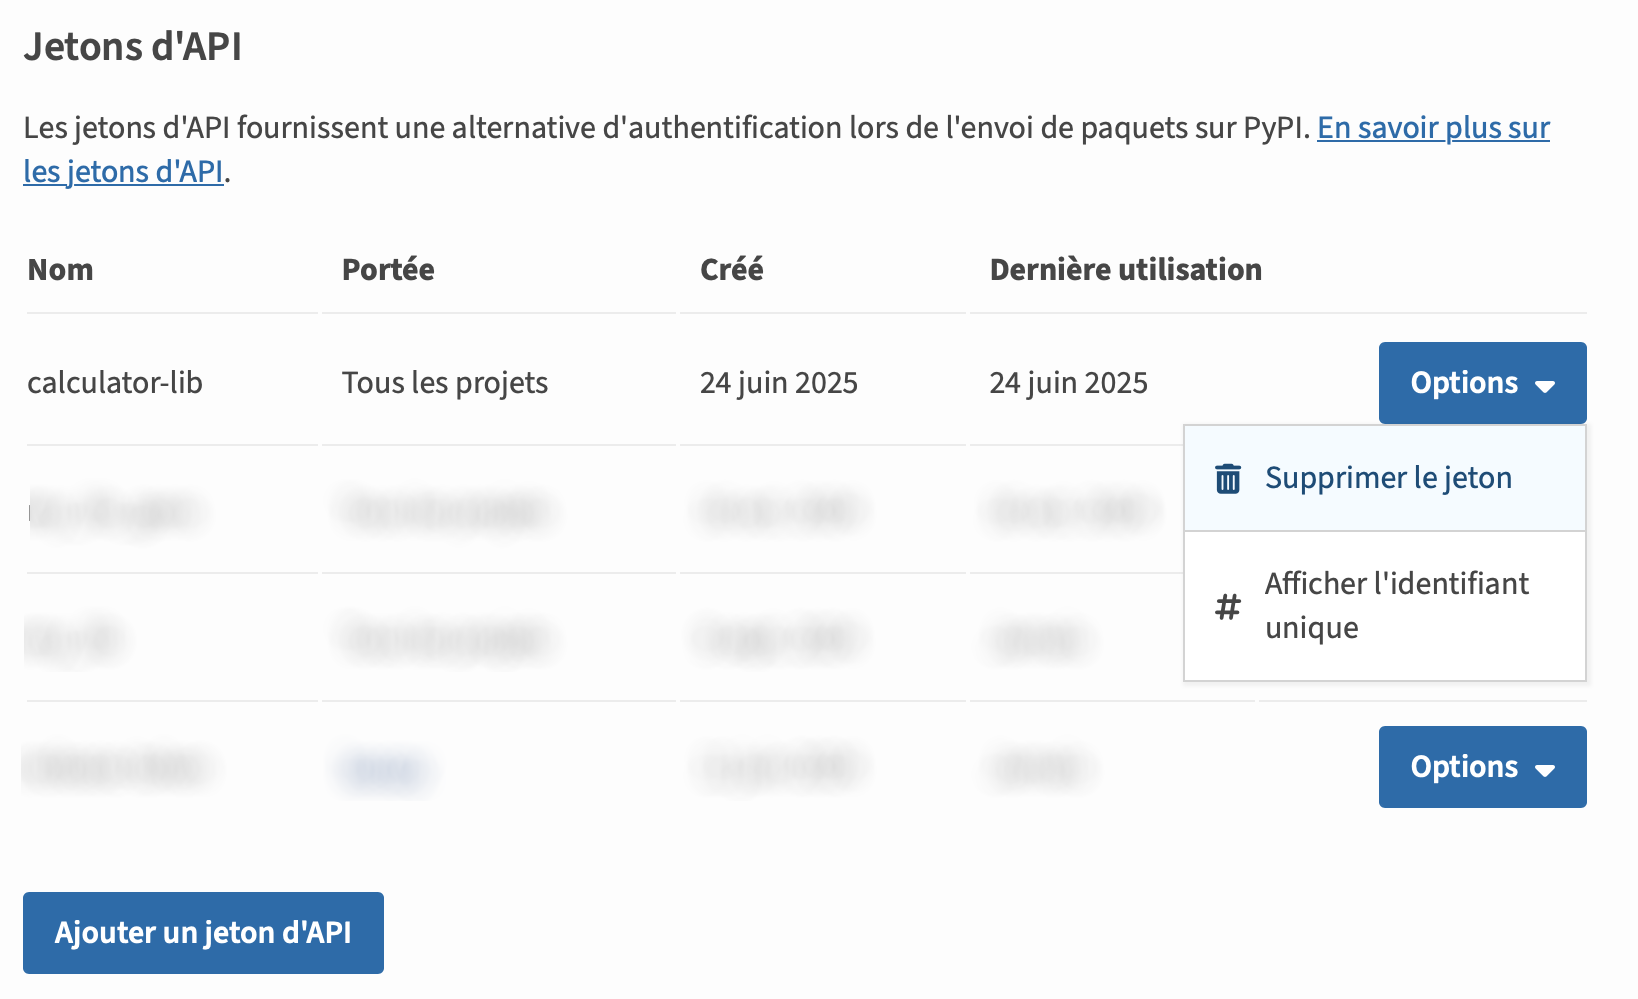

In [6]:
Image(filename="../images/delete_token.png")

Create a new API token, but this time you should see the project in the list:

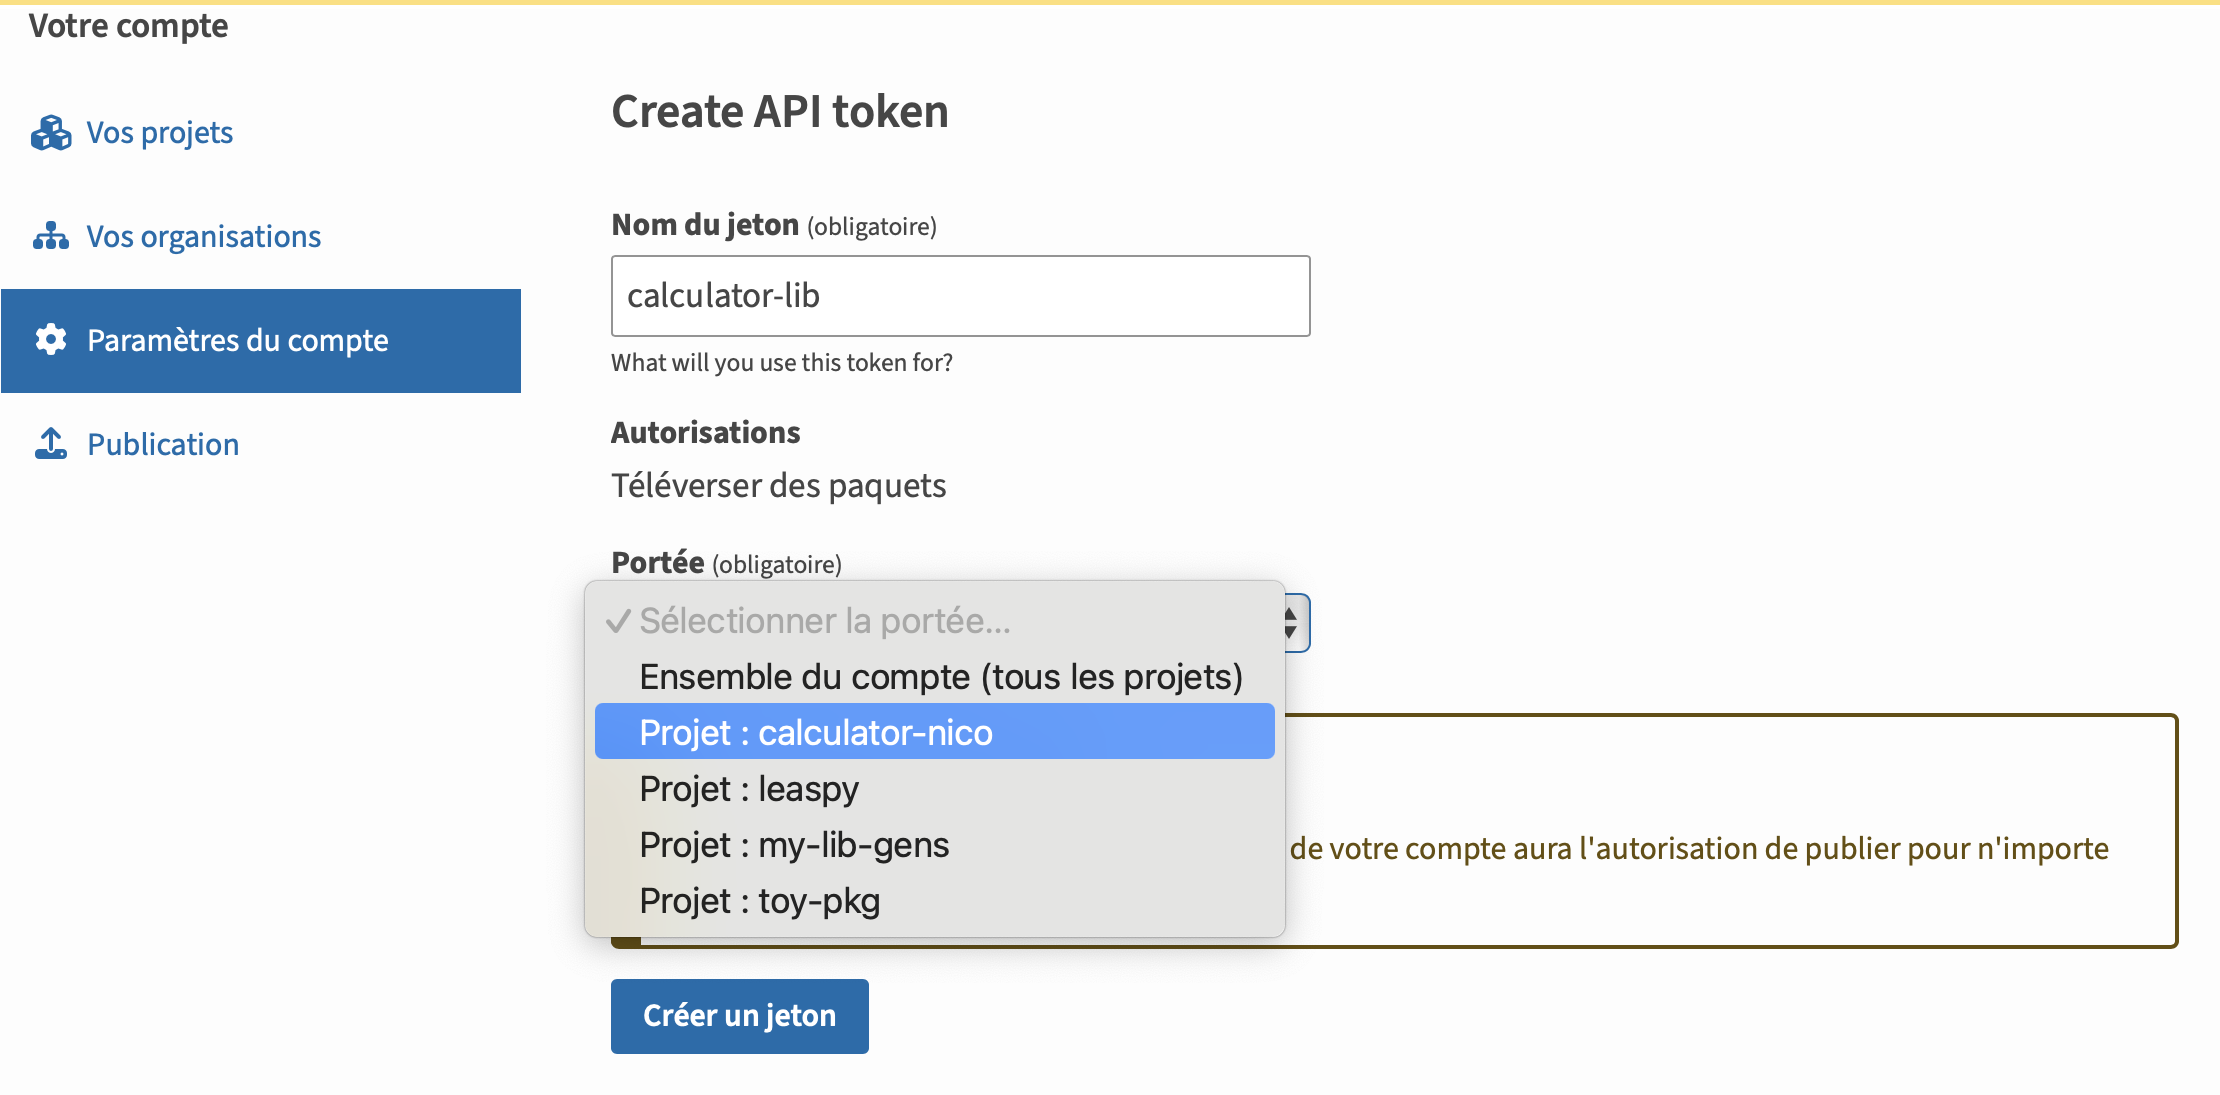

In [7]:
Image(filename="../images/new_token.png")

This will ensure our token has only permissions on this project which is what we want.

Now, we should do something with this token. In the previous section we used it directly in our Poetry command but we can clearly see that this is not gonna work for long, especially in a team with multiple engineers where each should have a copy of this token to be able to make the release.

Remember that our goal is to automate the publication using a Github action. We are going to put our token in a central place: our github repository. Of course not in the code since this is a sensitive piece of information but using *Github secrets*.

### Github secrets

We are going to use what is called a "Repository secret" to store our API token. You can see it as a dictionary where the keys are the names of the secrets (which can be written in the code and seen by everyone), and the values are encrypted strings that GitHub will manage for us. Note that there is no way to print the value once a secret is created.

Let's click on "Copier le jeton" and go to your calculator-lib repository on GitHub. Go to the Settings tab and go to "Secrets and variables" in the left menu. You should get to this page:

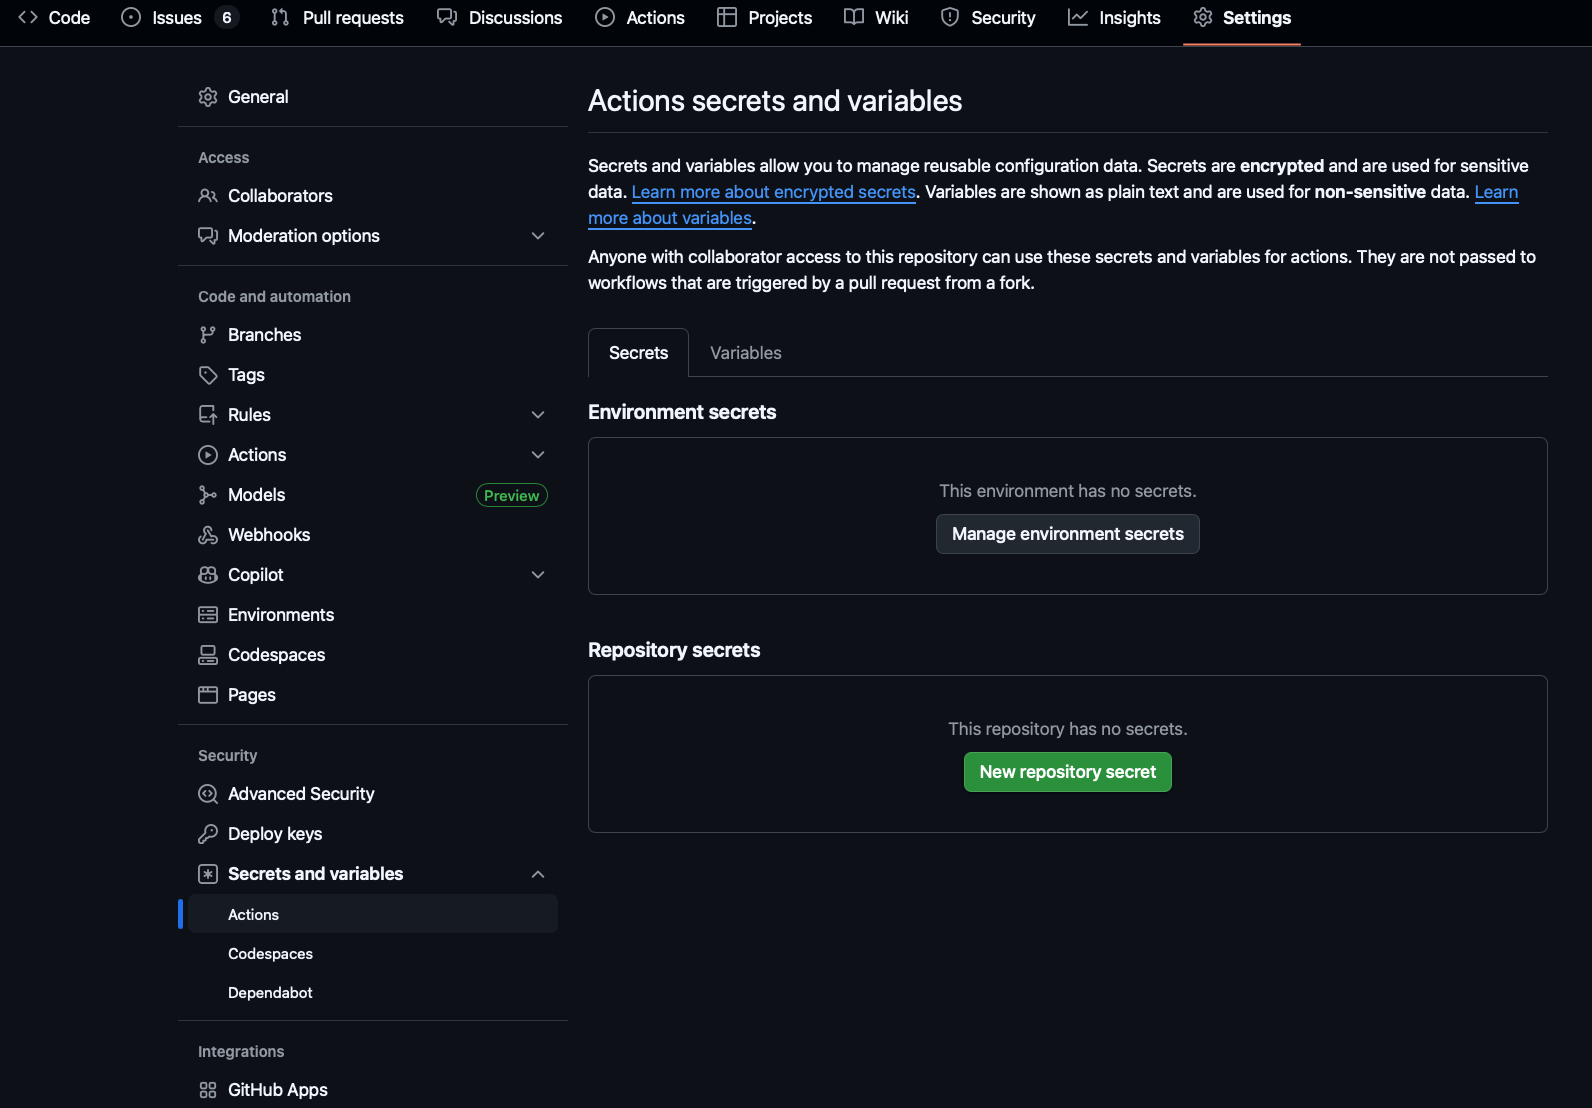

In [3]:
Image(filename="../images/test_pypi_3.png")

Click on "New repository secret" which should lead you to this page:

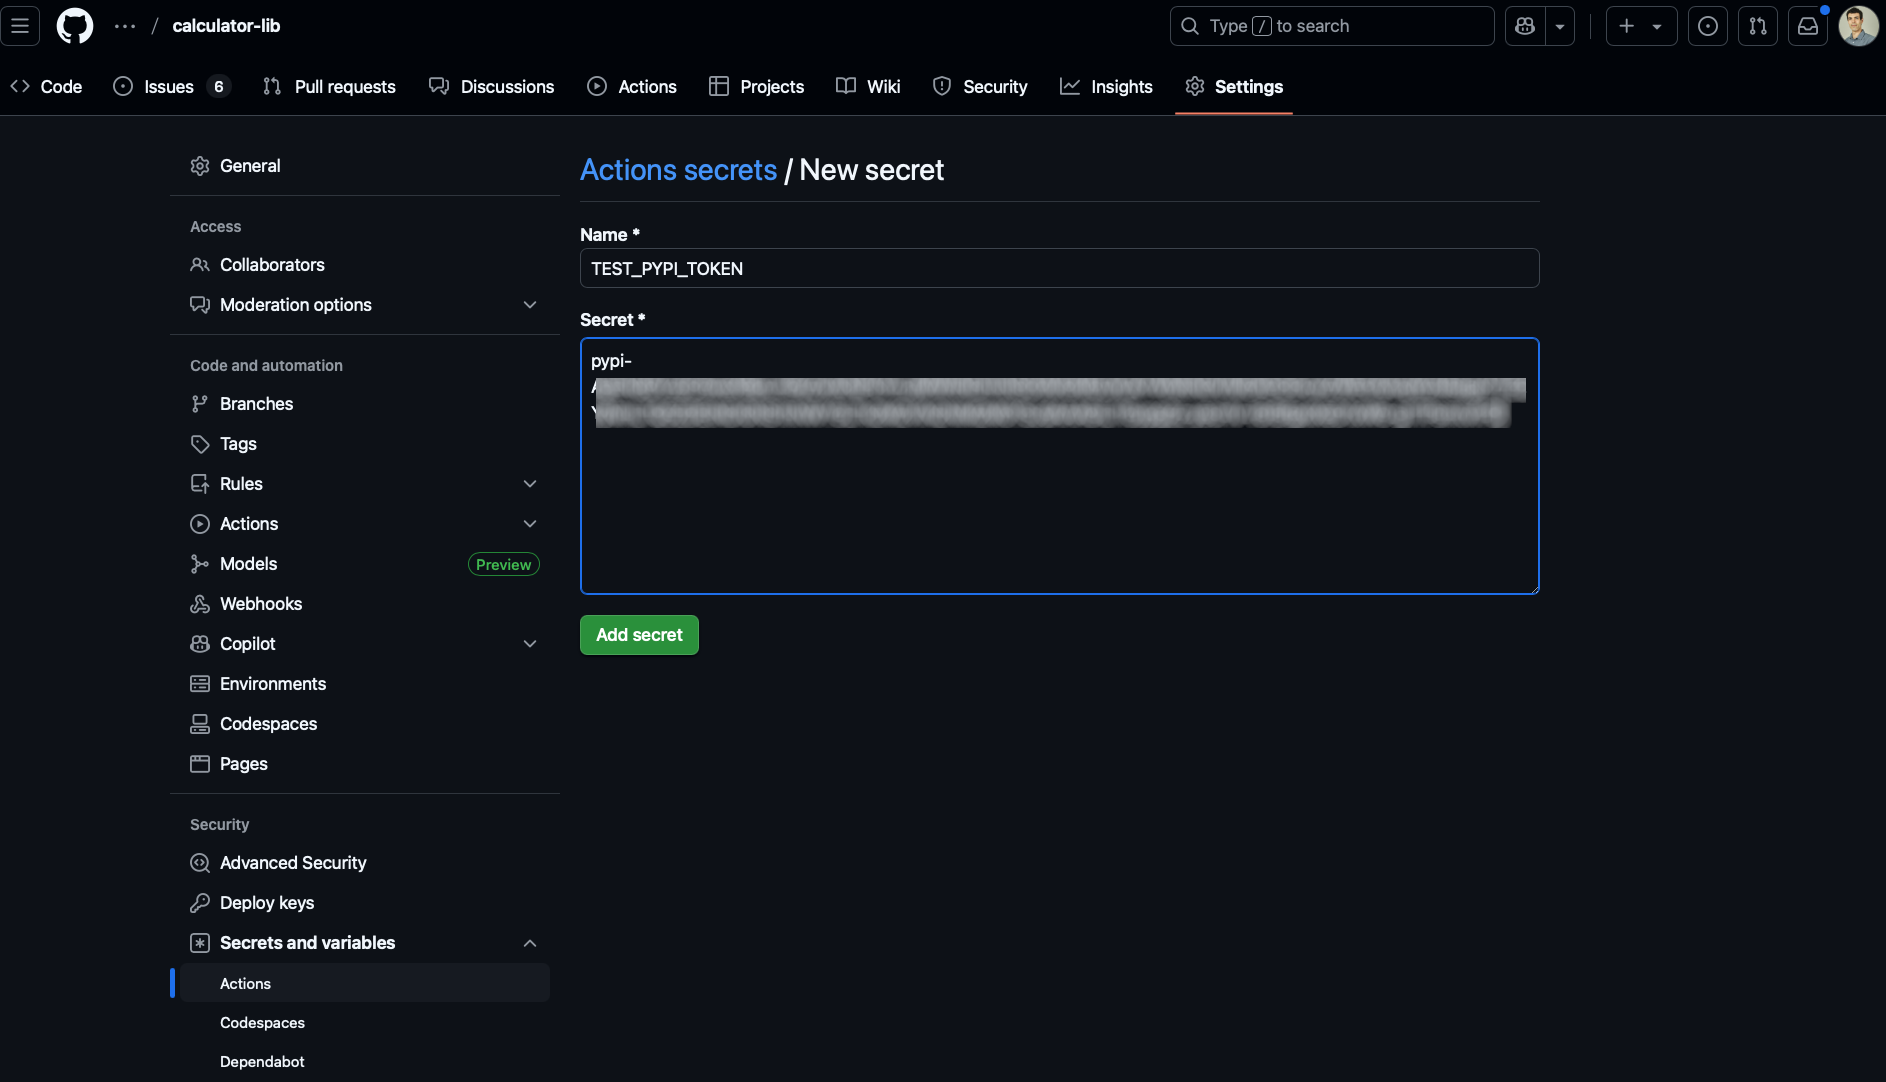

In [4]:
Image(filename="../images/test_pypi_4.png")

Give a meaningful name to remember what the secret is used for and paste your API token. Click on "Add secret":

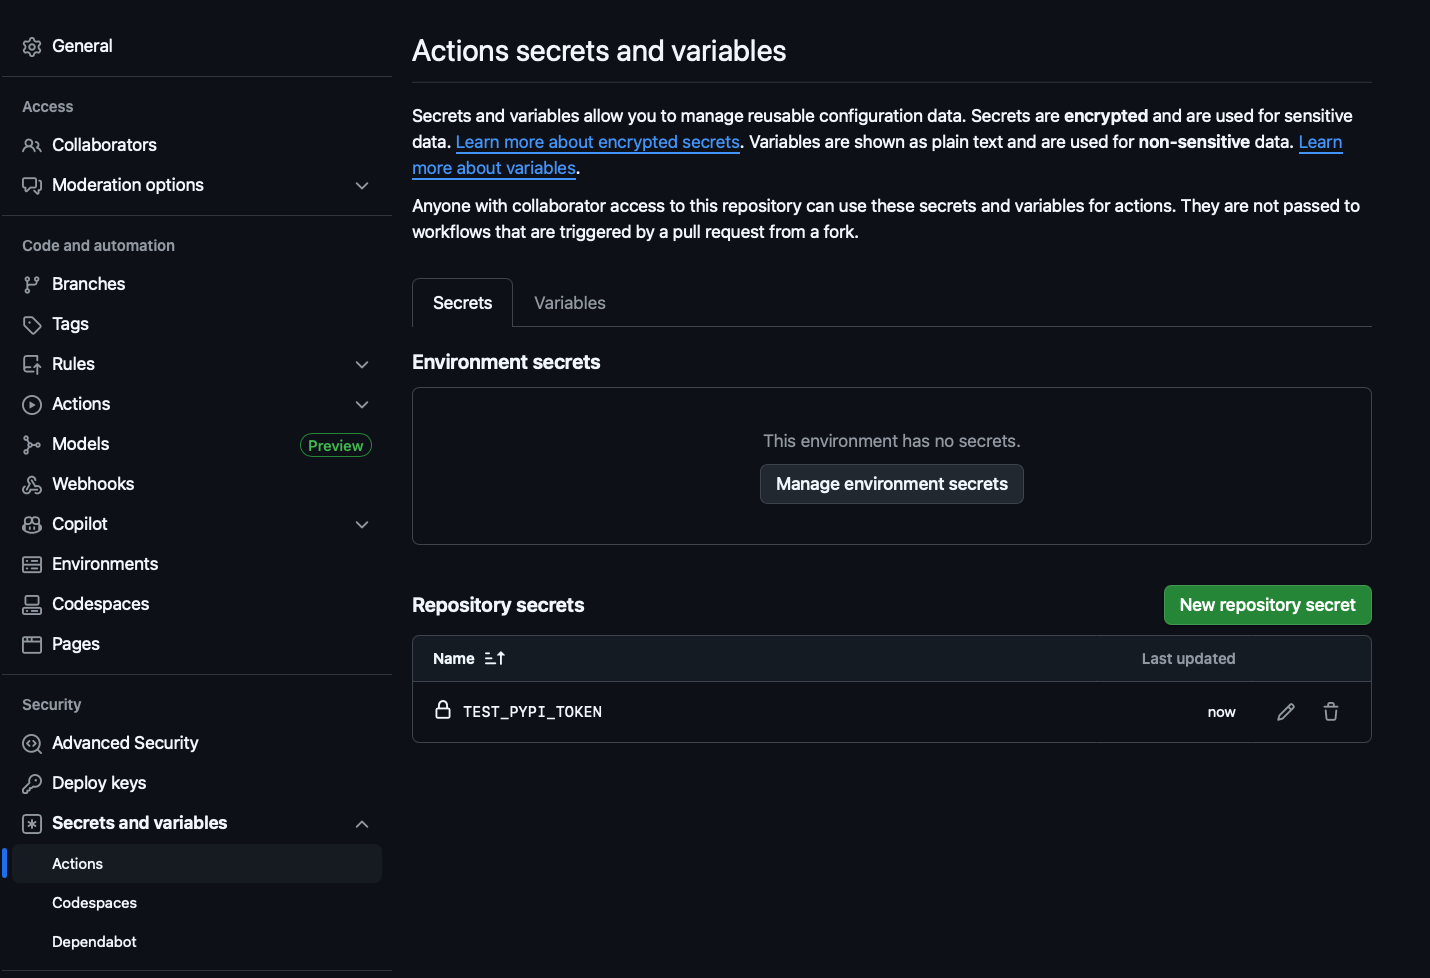

In [5]:
Image(filename="../images/test_pypi_5.png")

You should see it appear in the list of secrets. Note that you can delete it and edit it. If you click on edit, you can put a new value for the secret, but you don't see the previous value. Now close the tab of test-pypi because you don't want anybody to read this token.

Now that we have this configured, we can add the github action that will publish new releases automatically. Create a new file `.github/workflows/publish.yaml` with the following content:

```yaml
name: publish

on:
  release:
    types: [ published ]

permissions:
  contents: read

concurrency:
  group: ${{ github.workflow }}-${{ github.ref }}
  cancel-in-progress: true

jobs:
  publish:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v4
      - uses: snok/install-poetry@v1
      - uses: actions/setup-python@v5
        with:
          python-version: '3.x'
      - name: Add Test Pypi to repositories
        run: poetry config repositories.testpypi https://test.pypi.org/legacy/
      - name: Configure token
        run: poetry config pypi-token.testpypi ${{ secrets.TEST_PYPI_TOKEN }}
      - name: Build distribution
        run: poetry build
      - name: Publish to Test PyPI
        run: poetry publish --repository=testpypi
```

Commit and push to the `dev` branch.

Let's move all issues execept the subtraction implementation to milestone `v0.3.0`. All we need to do to reach our next milestone is to implement the subtraction between two images. This will be left as an exercise to the reader, but here is basically the required steps:

- Add a unit tests `tests/unittests/subract_test.py` inspired from the one we wrote for add
- Implement the subtraction in `src/calculator/subtract.py`
- Find a way to mutualize the function `_check_images_compatibility()`. One way is to put it in a new module and export it, such that both the `add` and `subtract` module can import it and use it.
- Make sure your implementation passes the tests
- Commit, push, and open a PR targetting `dev`. Merge.
- Open a release PR for v0.2.0 (don't forget to bump the version number in `pyproject.toml` in addition to updating the changelog). Merge it.
- Merge `dev` into `main`
- Create a new tag `v0.2.0` and push it
- Create a new Github release linked to this tag and publish it

At this point, go to the "Actions" tab of the Github repository. You should be able to see the publication workflow:

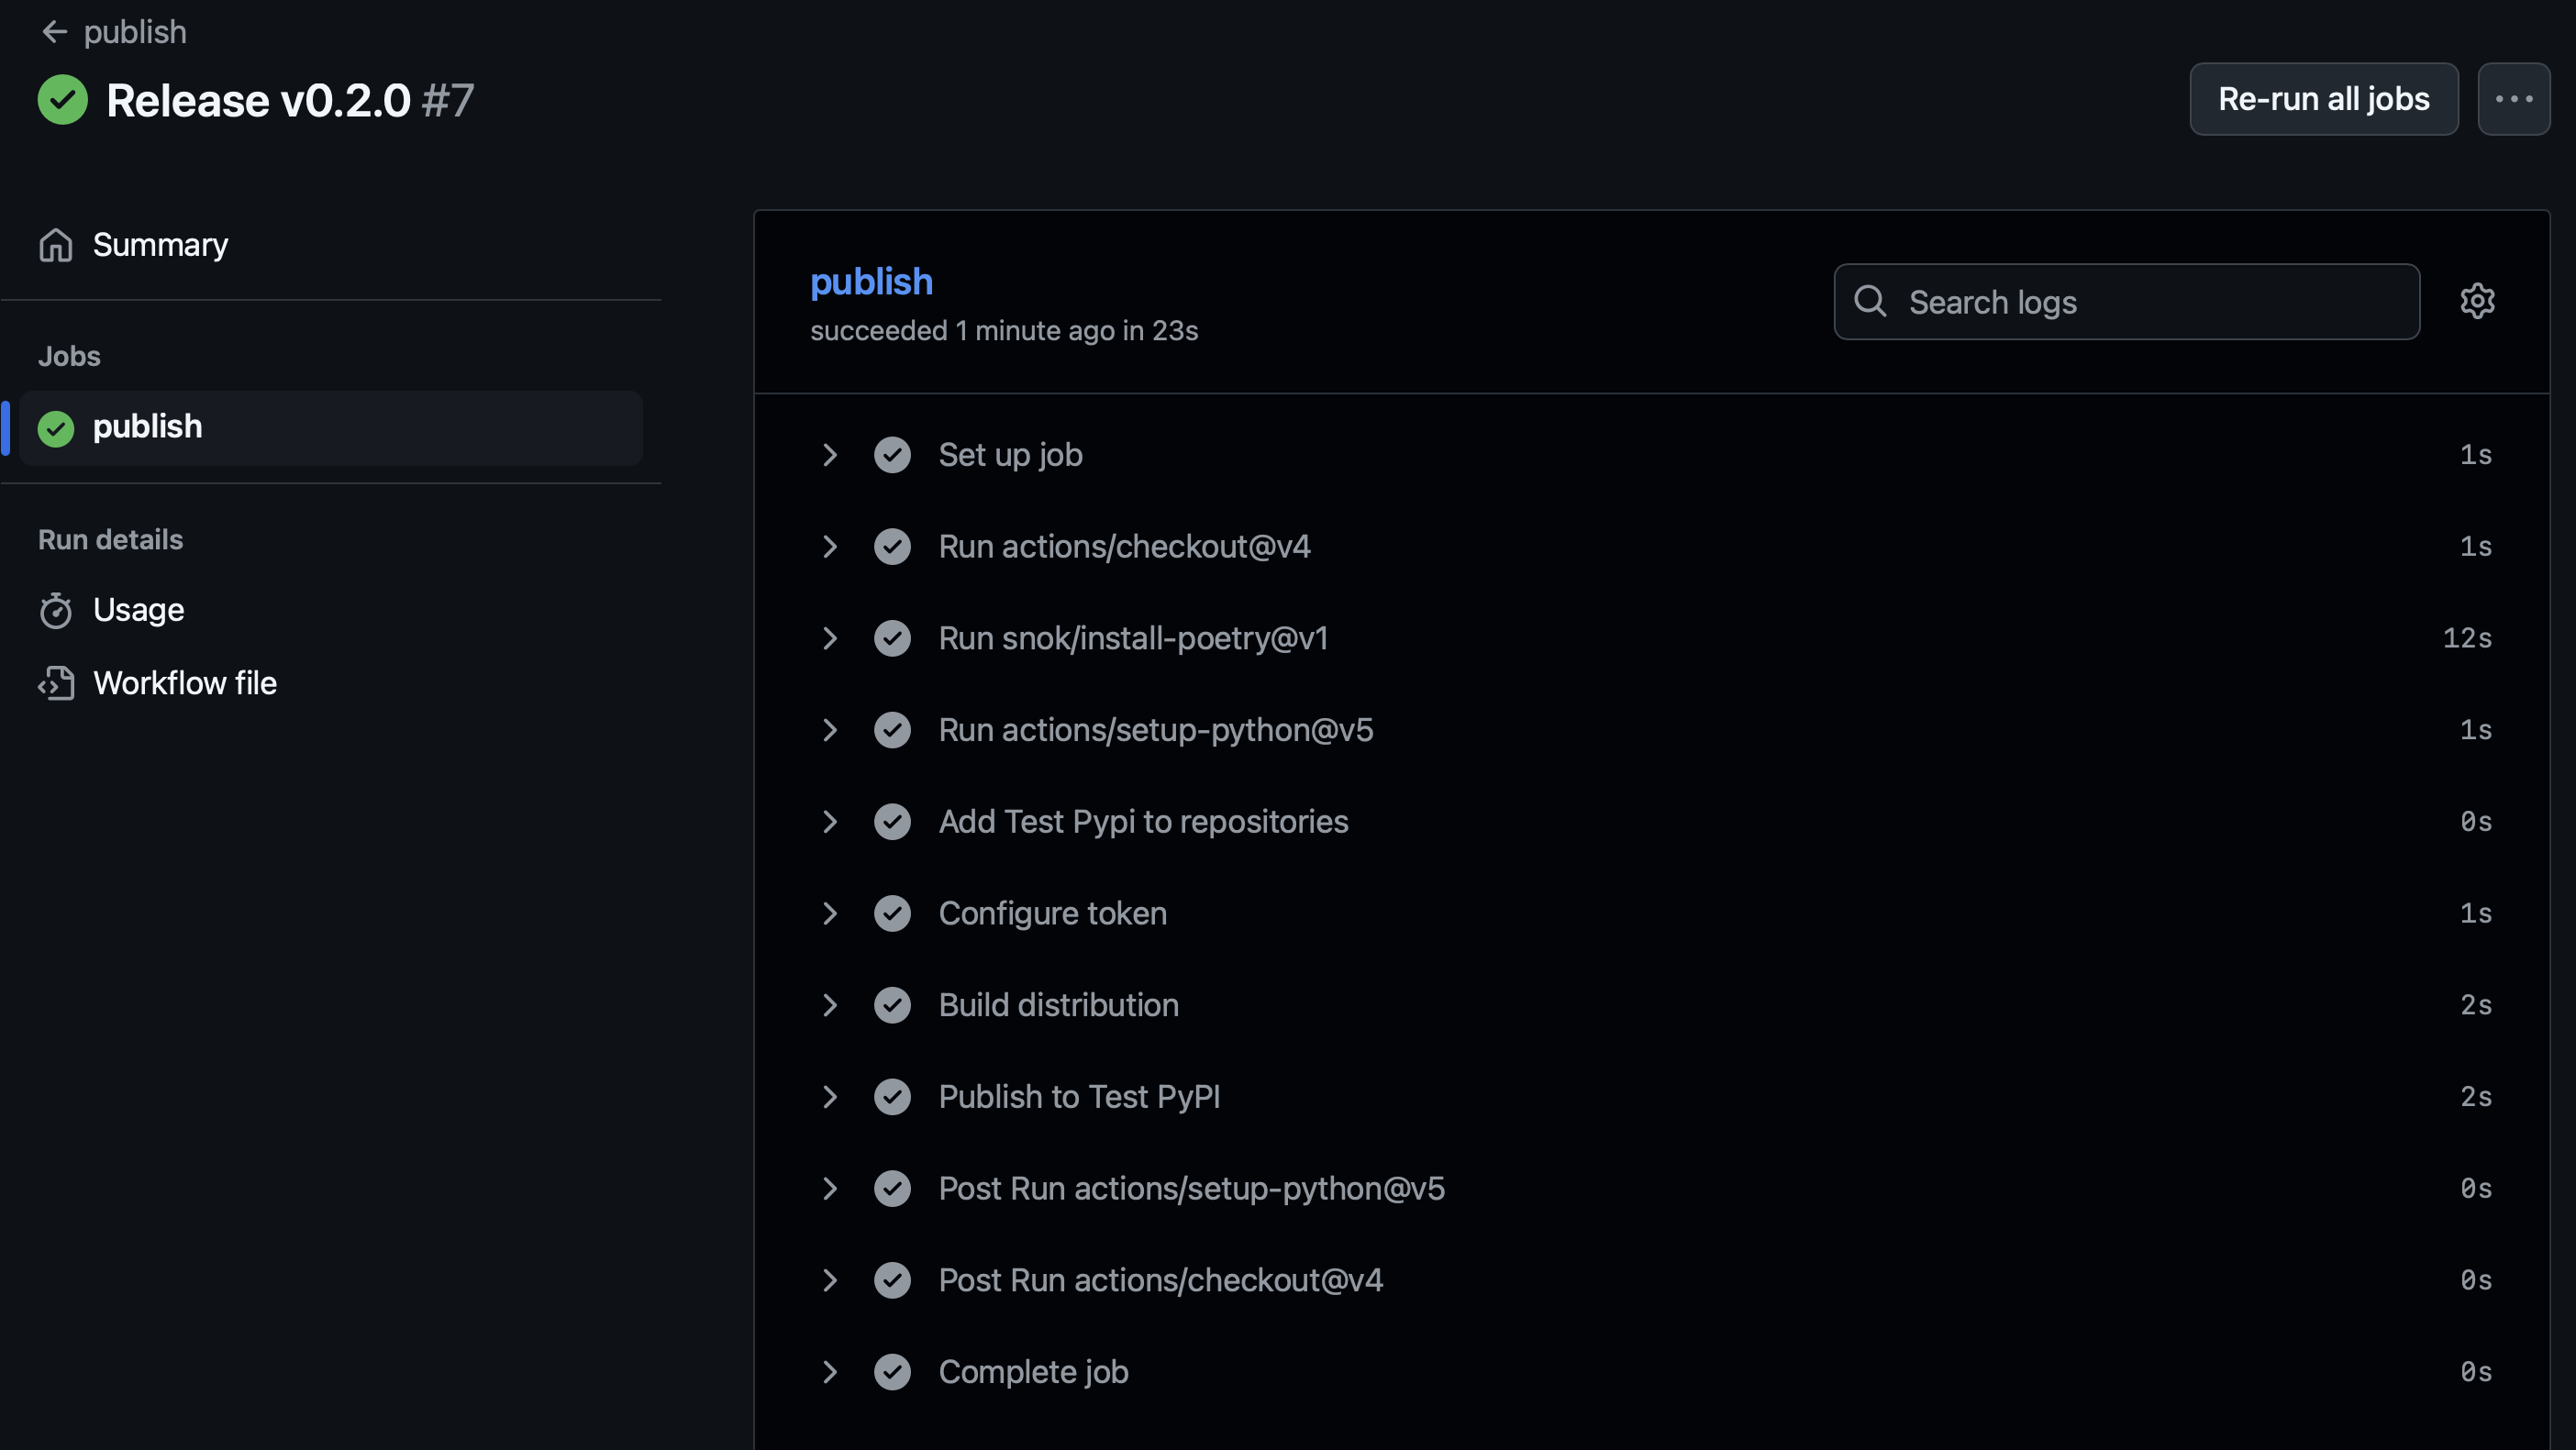

In [8]:
Image(filename="../images/publish_workflow.png")

You can then go to test Pypi and verify that the project has indeed a new release:

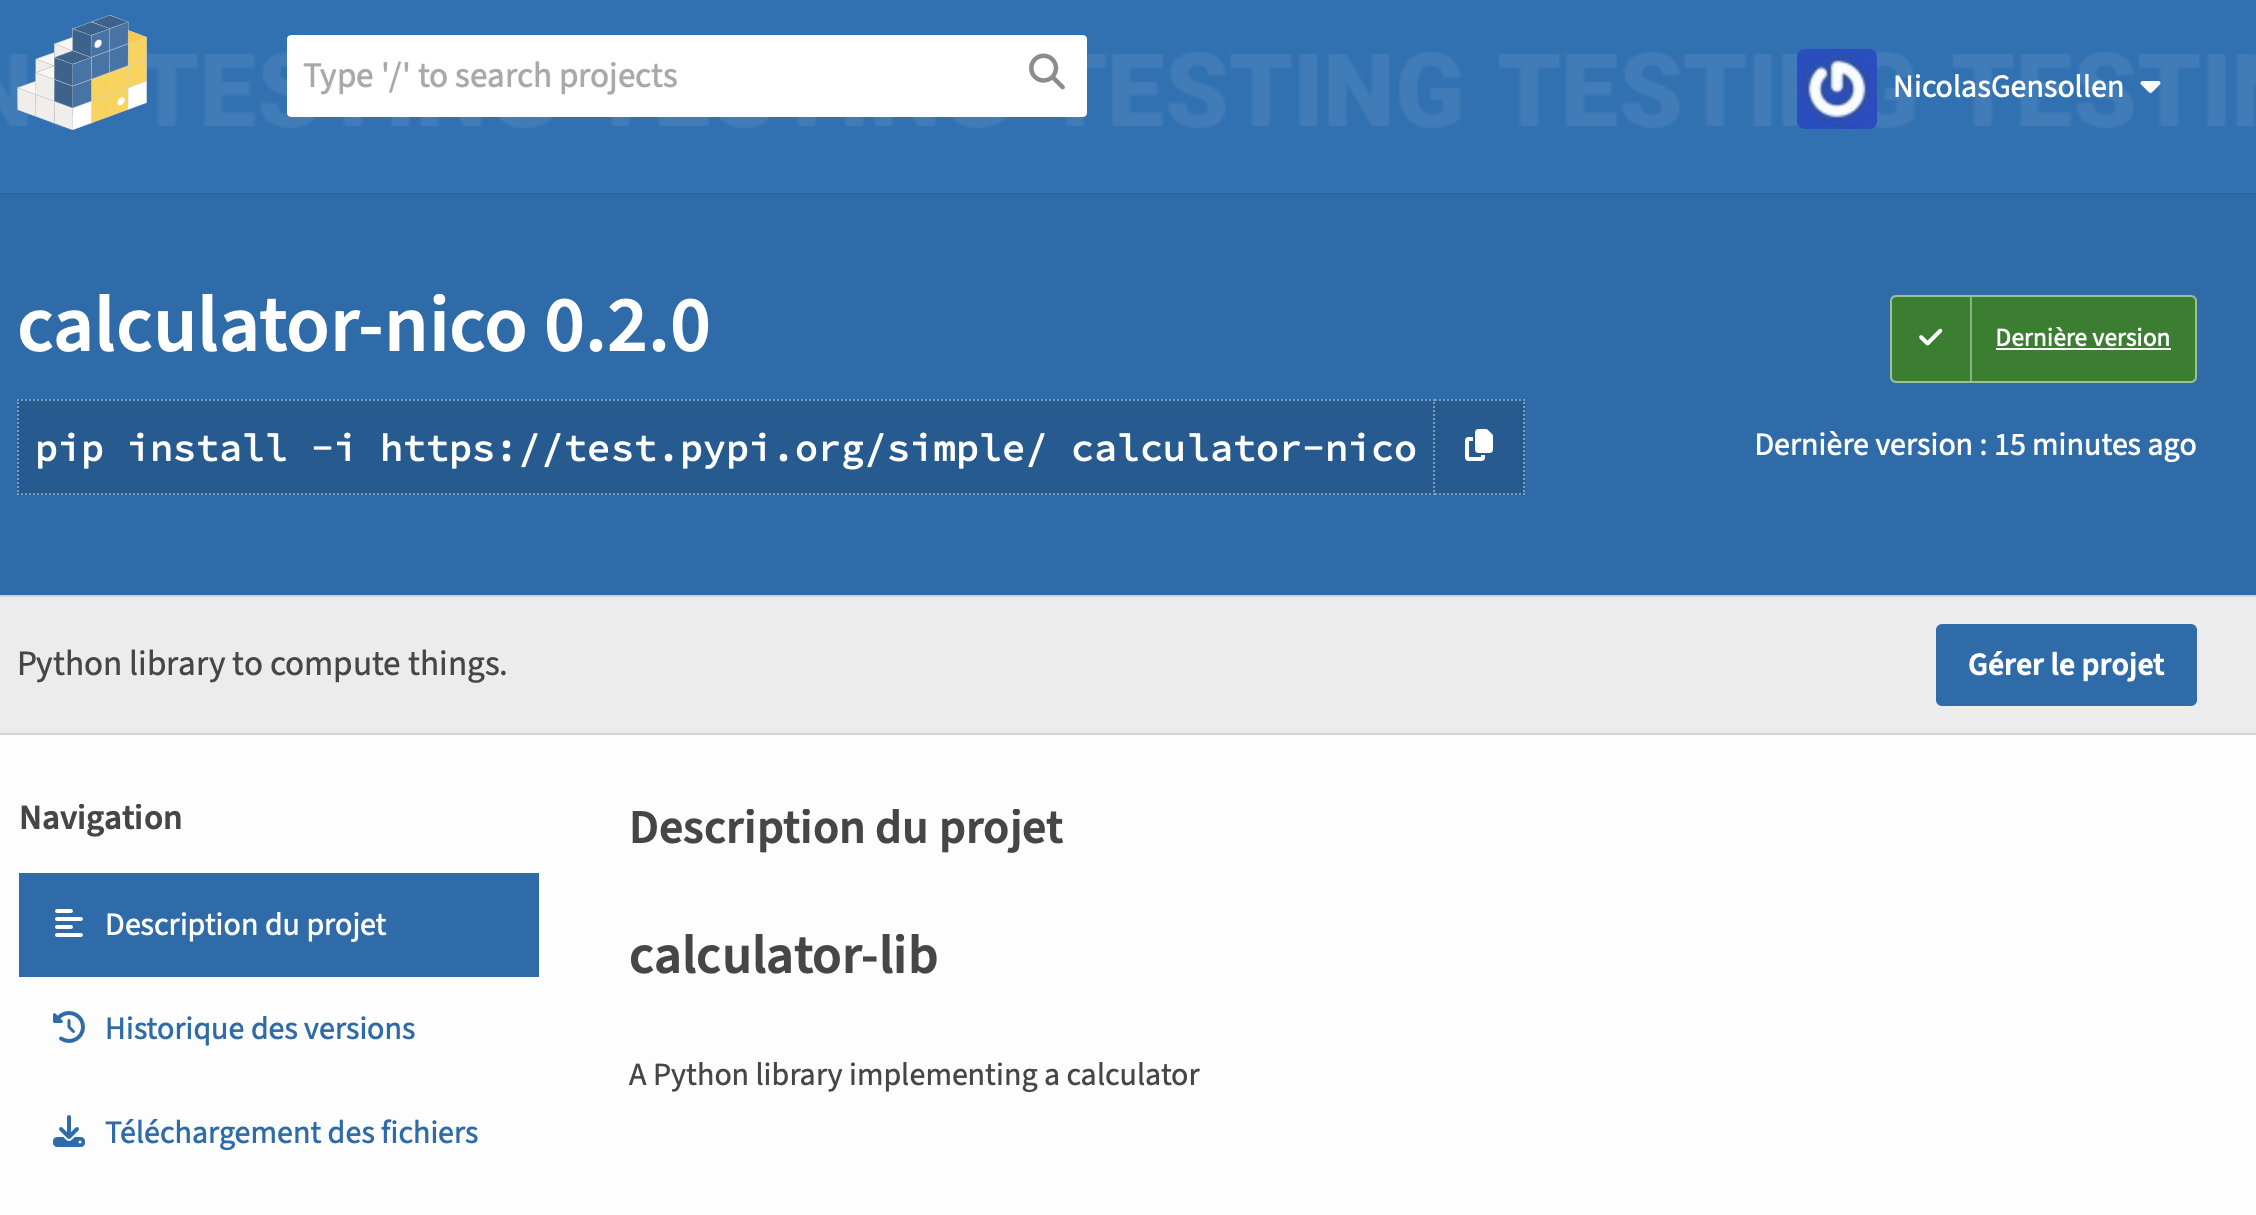

In [9]:
Image(filename="../images/release_test_pypi_2.png")

## Conclusion

Congratulations ! You've reached the end of this tutorial on how to develop softwares at Aramis.

You should now have a good understanding of how a project should be planned, how the code should be written and structured and how to automate a lot of things. These automations are a good things because they free the engineers from a lot of manual errors which can take a lot of time that can be now used for more important things. Still, it's important to know how this automation works, what is automated, and how the automated things work. This tutorial should have helped you reached these goals by introducing the tools, using them manually, and finally using automation.

If you want to practice a little bit by yourself, you can continue this small project. Remember that our roadmap goes to the `v1.0.0` and that there is still a bit of work to reach this point. You can also look around in the projects in the Aramis organization to see how these principles were adapted in the different projects. You should now be able to understand exactly what's going on and what are the different files used for.